### 解释深度学习神经元的原理

### 1.通过tf完成衣服，鞋子数据集的分类问题

In [92]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import sys
import os

In [93]:
!nvidia-smi

Tue Jul 19 15:21:41 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   64C    P0    28W /  70W |   1606MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [6]:
print(tf.__version__)

2.8.2


In [9]:
print(sys.version_info)

sys.version_info(major=3, minor=7, micro=13, releaselevel='final', serial=0)


In [94]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train, y_train), (x_test,y_test) = fashion_mnist.load_data()

In [11]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [95]:
# 从训练集中划分验证集
x_valid, x_train = x_train[:15000], x_train[15000:]
y_valid, y_train = y_train[:15000], y_train[15000:]

In [13]:
print(x_train.shape)
print(x_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(45000, 28, 28)
(15000, 28, 28)
(45000,)
(15000,)


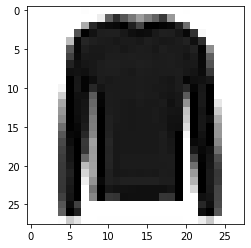

In [15]:
# 查看数据集中的样本
plt.imshow(x_train[0],cmap='binary')
plt.show()

In [97]:
# 开始搭建模型
model = keras.models.Sequential()
# 依次添加层，首先确定输入的大小是28*28
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation='relu'))
model.add(keras.layers.Dense(100,activation='relu'))
# 最后一层用于分类，要分几类就确定几个神经元
model.add(keras.layers.Dense(10,activation='softmax'))
# 编译模型
model.compile(loss='sparse_categorical_crossentropy',
              optimizer = keras.optimizers.SGD(0.001),
              metrics=['accuracy'])

In [17]:
# 训练模型
history = model.fit(x_train,y_train,epochs=20,
                    validation_data = (x_valid,y_valid))

Epoch 1/20
1407/1407 [==============================] - 8s 4ms/step - loss: 3.0851 - accuracy: 0.6982 - val_loss: 0.8005 - val_accuracy: 0.7335
Epoch 2/20
1407/1407 [==============================] - 4s 3ms/step - loss: 0.5963 - accuracy: 0.7854 - val_loss: 0.6158 - val_accuracy: 0.7869
Epoch 3/20
1407/1407 [==============================] - 5s 3ms/step - loss: 0.5240 - accuracy: 0.8099 - val_loss: 0.5618 - val_accuracy: 0.8098
Epoch 4/20
1407/1407 [==============================] - 5s 3ms/step - loss: 0.4790 - accuracy: 0.8252 - val_loss: 0.5175 - val_accuracy: 0.8205
Epoch 5/20
1407/1407 [==============================] - 5s 4ms/step - loss: 0.4502 - accuracy: 0.8336 - val_loss: 0.6282 - val_accuracy: 0.7905
Epoch 6/20
1407/1407 [==============================] - 5s 3ms/step - loss: 0.4282 - accuracy: 0.8423 - val_loss: 0.5650 - val_accuracy: 0.8057
Epoch 7/20
1407/1407 [==============================] - 4s 3ms/step - loss: 0.4103 - accuracy: 0.8479 - val_loss: 0.5010 - val_accuracy:

In [28]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [30]:
history_dict = history.history
train_loss = history_dict['loss']
val_loss = history_dict['val_loss']
train_acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
epochs = range(1, len(train_loss)+1)

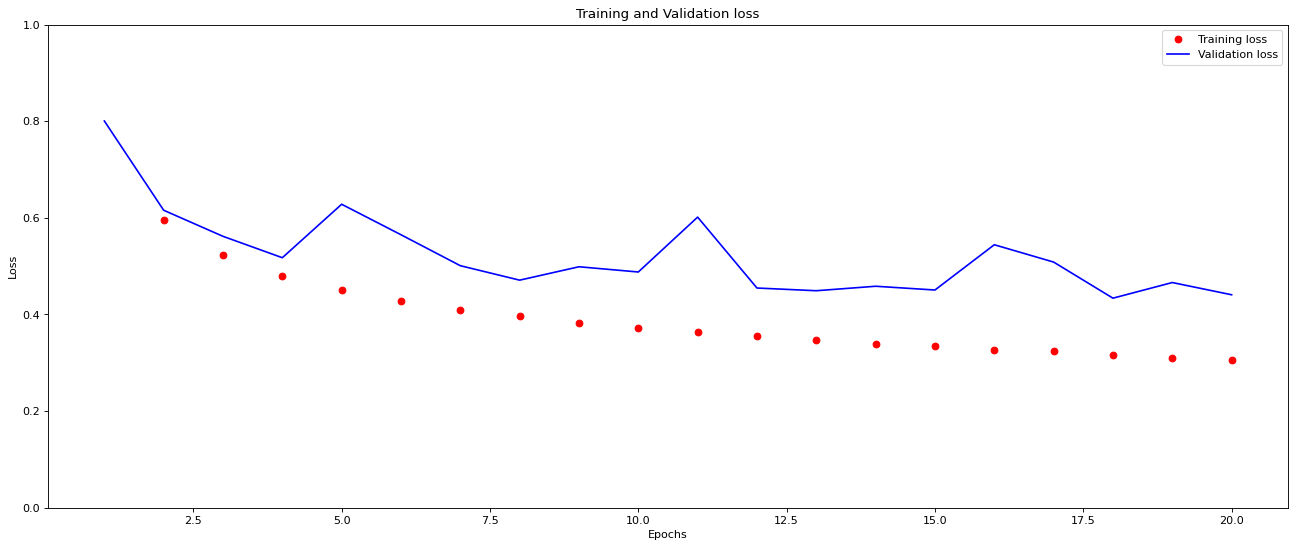

In [35]:
# 进行画图，对训练结果进行可视化
plt.figure(figsize=(20,8),dpi=80)
# 训练损失
plt.plot(epochs,train_loss,'bo',c='red',label='Training loss')
# 验证损失
plt.plot(epochs,val_loss,'b',c='blue',label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0,1)
plt.legend() # 图例
plt.show()

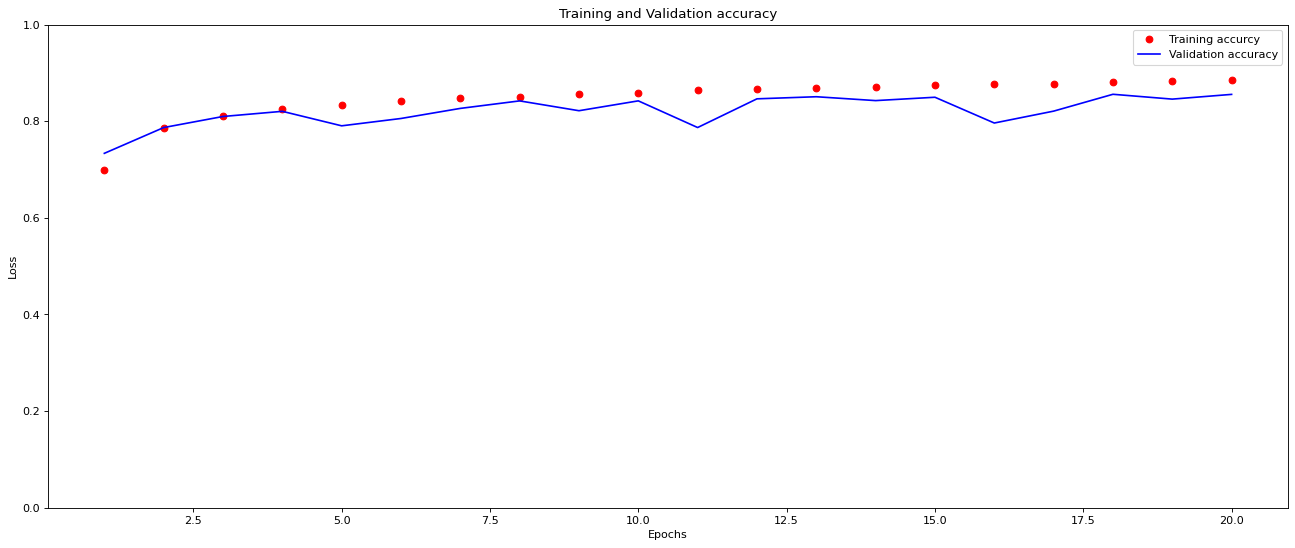

In [36]:
plt.figure(figsize=(20,8),dpi=80)
# 训练精度
plt.plot(epochs,train_acc,'bo',c='red',label='Training accurcy')
# 验证精度
plt.plot(epochs,val_acc,'b',c='blue',label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0,1)
plt.legend() # 图例
plt.show()

由loss和acc图可见，这次训练并没有过拟合

In [37]:
# 使用测试集对训练好的模型进行测试,test=0.47,test_acc=0.845
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4718 - accuracy: 0.8453


[0.4718037545681, 0.845300018787384]

### 2.加入标准化之后在此进行训练，并观察loss和acc

In [96]:
# 对数据进行标准化
from sklearn.preprocessing import StandardScaler
stand = StandardScaler()
x_train = x_train.reshape(-1,1)
x_train = stand.fit_transform(x_train).reshape(-1,28,28)
x_valid = x_valid.reshape(-1,1)
x_valid = stand.transform(x_valid).reshape(-1,28,28)
x_test = x_test.reshape(-1,1)
x_test = stand.transform(x_test).reshape(-1,28,28)

In [57]:
# 先重新运行上面的模型搭建和编译，然后再次训练模型
history = model.fit(x_train,y_train,epochs=20,
                    validation_data = (x_valid,y_valid))

Epoch 1/20
1407/1407 [==============================] - 4s 3ms/step - loss: 0.3432 - accuracy: 0.8789 - val_loss: 0.3671 - val_accuracy: 0.8675
Epoch 2/20
1407/1407 [==============================] - 5s 3ms/step - loss: 0.3395 - accuracy: 0.8796 - val_loss: 0.3655 - val_accuracy: 0.8687
Epoch 3/20
1407/1407 [==============================] - 4s 3ms/step - loss: 0.3361 - accuracy: 0.8814 - val_loss: 0.3628 - val_accuracy: 0.8713
Epoch 4/20
1407/1407 [==============================] - 5s 3ms/step - loss: 0.3327 - accuracy: 0.8827 - val_loss: 0.3602 - val_accuracy: 0.8714
Epoch 5/20
1407/1407 [==============================] - 5s 3ms/step - loss: 0.3295 - accuracy: 0.8834 - val_loss: 0.3578 - val_accuracy: 0.8717
Epoch 6/20
1407/1407 [==============================] - 4s 3ms/step - loss: 0.3264 - accuracy: 0.8851 - val_loss: 0.3557 - val_accuracy: 0.8737
Epoch 7/20
1407/1407 [==============================] - 5s 3ms/step - loss: 0.3236 - accuracy: 0.8858 - val_loss: 0.3590 - val_accuracy:

In [58]:
# 再次使用测试集对数据标准化后训练的模型进行测试
# 可以很明显的看见数据经过标准化之后精度提升了不少
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3679 - accuracy: 0.8688


[0.3678685128688812, 0.8687999844551086]

### 3.使用回掉函数能够实现训练提前终止

In [64]:
# 通过增加训练次数，重新进行模型的训练
history = model.fit(x_train,y_train,epochs=100,
                    validation_data = (x_valid,y_valid))

Epoch 1/100
1407/1407 [==============================] - 5s 4ms/step - loss: 0.2892 - accuracy: 0.8979 - val_loss: 0.3389 - val_accuracy: 0.8780
Epoch 2/100
1407/1407 [==============================] - 5s 3ms/step - loss: 0.2871 - accuracy: 0.8994 - val_loss: 0.3385 - val_accuracy: 0.8775
Epoch 3/100
1407/1407 [==============================] - 4s 3ms/step - loss: 0.2853 - accuracy: 0.8991 - val_loss: 0.3347 - val_accuracy: 0.8799
Epoch 4/100
1407/1407 [==============================] - 5s 3ms/step - loss: 0.2832 - accuracy: 0.9006 - val_loss: 0.3353 - val_accuracy: 0.8787
Epoch 5/100
1407/1407 [==============================] - 4s 3ms/step - loss: 0.2816 - accuracy: 0.9009 - val_loss: 0.3334 - val_accuracy: 0.8795
Epoch 6/100
1407/1407 [==============================] - 5s 3ms/step - loss: 0.2793 - accuracy: 0.9018 - val_loss: 0.3340 - val_accuracy: 0.8793
Epoch 7/100
1407/1407 [==============================] - 4s 3ms/step - loss: 0.2773 - accuracy: 0.9023 - val_loss: 0.3309 - val_ac

In [72]:
history_dict = history.history
train_loss = history_dict['loss']
val_loss = history_dict['val_loss']
train_acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
epochs = range(1, len(train_loss)+1)

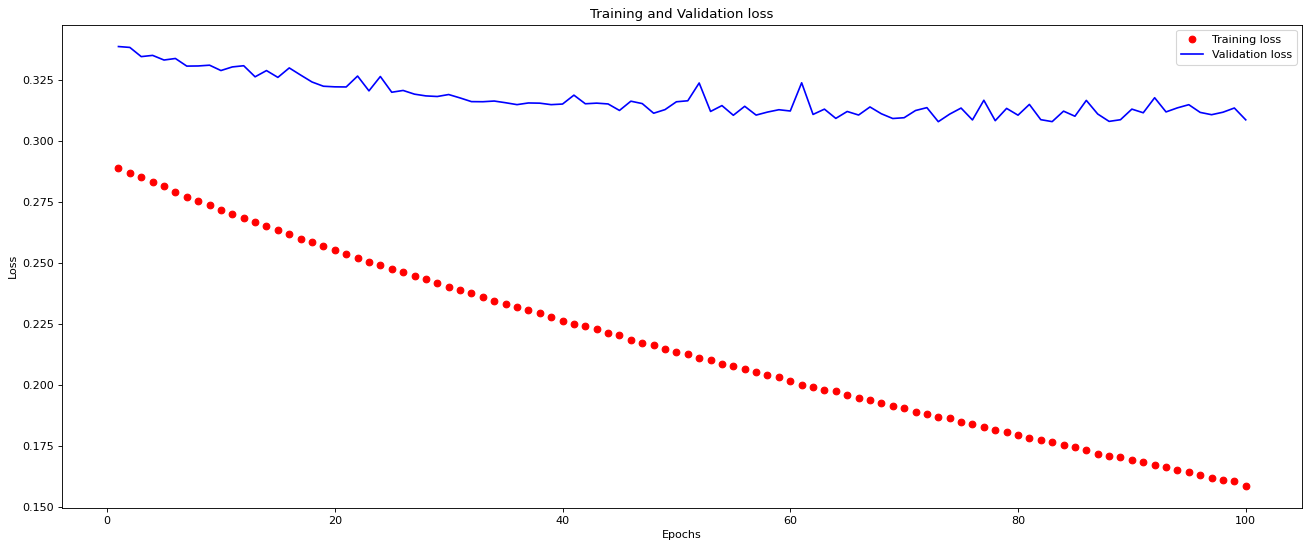

In [76]:
plt.figure(figsize=(20,8),dpi=80)
# 训练损失
plt.plot(epochs,train_loss,'bo',c='red',label='Training loss')
# 验证损失
plt.plot(epochs,val_loss,'b',c='blue',label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend() # 图例
plt.show()

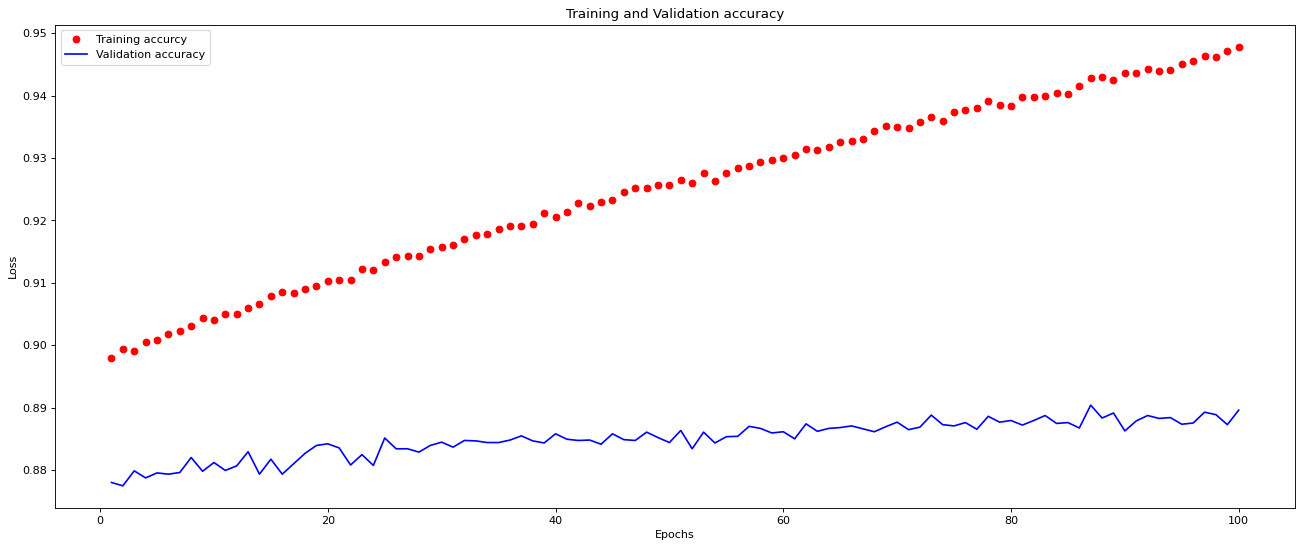

In [75]:
plt.figure(figsize=(20,8),dpi=80)
# 训练精度
plt.plot(epochs,train_acc,'bo',c='red',label='Training accurcy')
# 验证精度
plt.plot(epochs,val_acc,'b',c='blue',label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend() # 图例
plt.show()

In [ ]:
# 由上图可以很明显的看出来随着训练无误差的减少，验证误差几乎不变
# 训练精度不断的增加，验证精度也不再增加，说明了已经过拟合

In [85]:
# 通过使用回掉函数callbacks来实现，在精度提升不高的情况下提前终止训练
logdir = './callbacks'
if not os.path.exists(logdir):
  os.mkdir(logdir)

In [98]:
output_model_file = os.path.join(logdir,"fashion_mnist_model.h5")
callbacks = [
             # 用于画画
             keras.callbacks.TensorBoard(logdir),
             # 保存模型的最佳参数
             keras.callbacks.ModelCheckpoint(
                 output_model_file,save_best_only=True),
             # 用于监控验证集的精度变化,小于1e-2时就停止训练
             keras.callbacks.EarlyStopping(patience=5,min_delta=1e-3)
]

In [99]:
# 重新进行训练，并继续把epochs设置成100，看是否会提前停止
history = model.fit(x_train,y_train,epochs=100,
                    validation_data = (x_valid,y_valid),
                    callbacks = callbacks)

Epoch 1/100
1407/1407 [==============================] - 6s 4ms/step - loss: 0.9521 - accuracy: 0.6938 - val_loss: 0.6571 - val_accuracy: 0.7737
Epoch 2/100
1407/1407 [==============================] - 5s 3ms/step - loss: 0.6028 - accuracy: 0.7906 - val_loss: 0.5596 - val_accuracy: 0.8036
Epoch 3/100
1407/1407 [==============================] - 5s 3ms/step - loss: 0.5341 - accuracy: 0.8109 - val_loss: 0.5155 - val_accuracy: 0.8188
Epoch 4/100
1407/1407 [==============================] - 5s 3ms/step - loss: 0.4958 - accuracy: 0.8242 - val_loss: 0.4842 - val_accuracy: 0.8293
Epoch 5/100
1407/1407 [==============================] - 5s 4ms/step - loss: 0.4696 - accuracy: 0.8341 - val_loss: 0.4629 - val_accuracy: 0.8359
Epoch 6/100
1407/1407 [==============================] - 5s 4ms/step - loss: 0.4497 - accuracy: 0.8410 - val_loss: 0.4473 - val_accuracy: 0.8411
Epoch 7/100
1407/1407 [==============================] - 5s 3ms/step - loss: 0.4340 - accuracy: 0.8468 - val_loss: 0.4354 - val_ac

In [100]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3662 - accuracy: 0.8694


[0.3661748766899109, 0.8694000244140625]